<h3> I have predicted the wine quality using KNN algorithm 
    I also used Decision Tree Algorithm for classification and found similar accuracy<h2>
  <h3> The dataset can be downloaded from My Github repo</h3>

In [121]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
data = pd.read_csv('Wine_Quality_Data.csv')

In [109]:
data.head()
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'goodquality'],
      dtype='object')

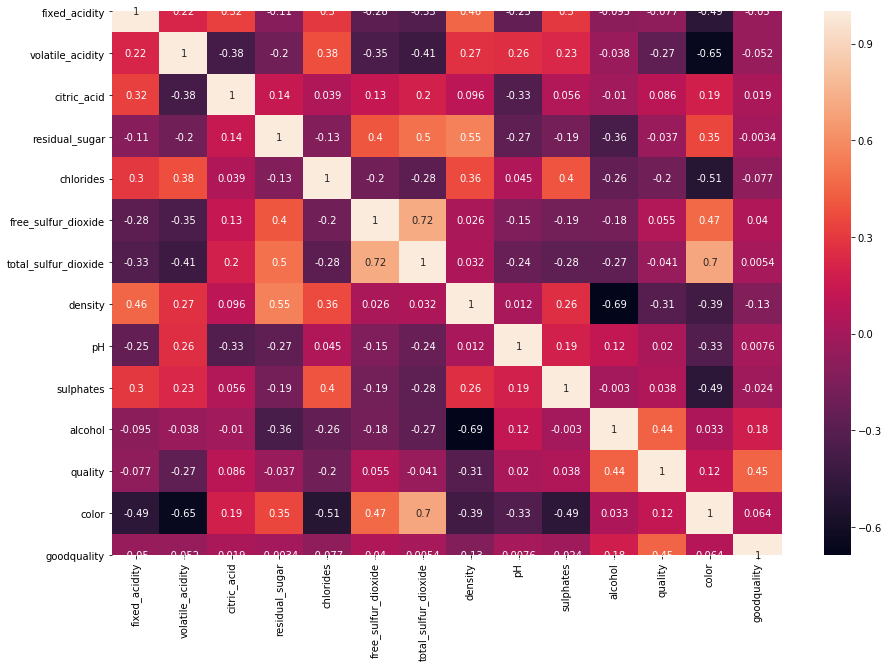

In [127]:
corr= data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [77]:
data['color'].unique()
data['color']=data['color'].map({'red':0,
                    'white':1})

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
data['goodquality'] = [1 if x>7 else 0 for x in data['quality']]

In [80]:
training = data.drop(['quality','goodquality'],axis=1)

In [81]:
test = data['goodquality']

In [82]:
model = KNeighborsClassifier()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x,x_test,y,y_test =train_test_split(training , test  ,random_state=0,test_size=0.2)

In [85]:
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
y_pred = model.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [88]:
cn = confusion_matrix(y_test,y_pred)

In [89]:
cn

array([[1253,    5],
       [  35,    7]], dtype=int64)

In [90]:
accuracy = accuracy_score(y_test,y_pred)

In [91]:
accuracy

0.9692307692307692

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
model2 = DecisionTreeClassifier()

In [94]:
model2.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
prediction  = model.predict(x_test)

In [96]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import tree

In [115]:
features = list(data.columns[:11])

In [117]:
features.append('color')

In [118]:
features

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'color']

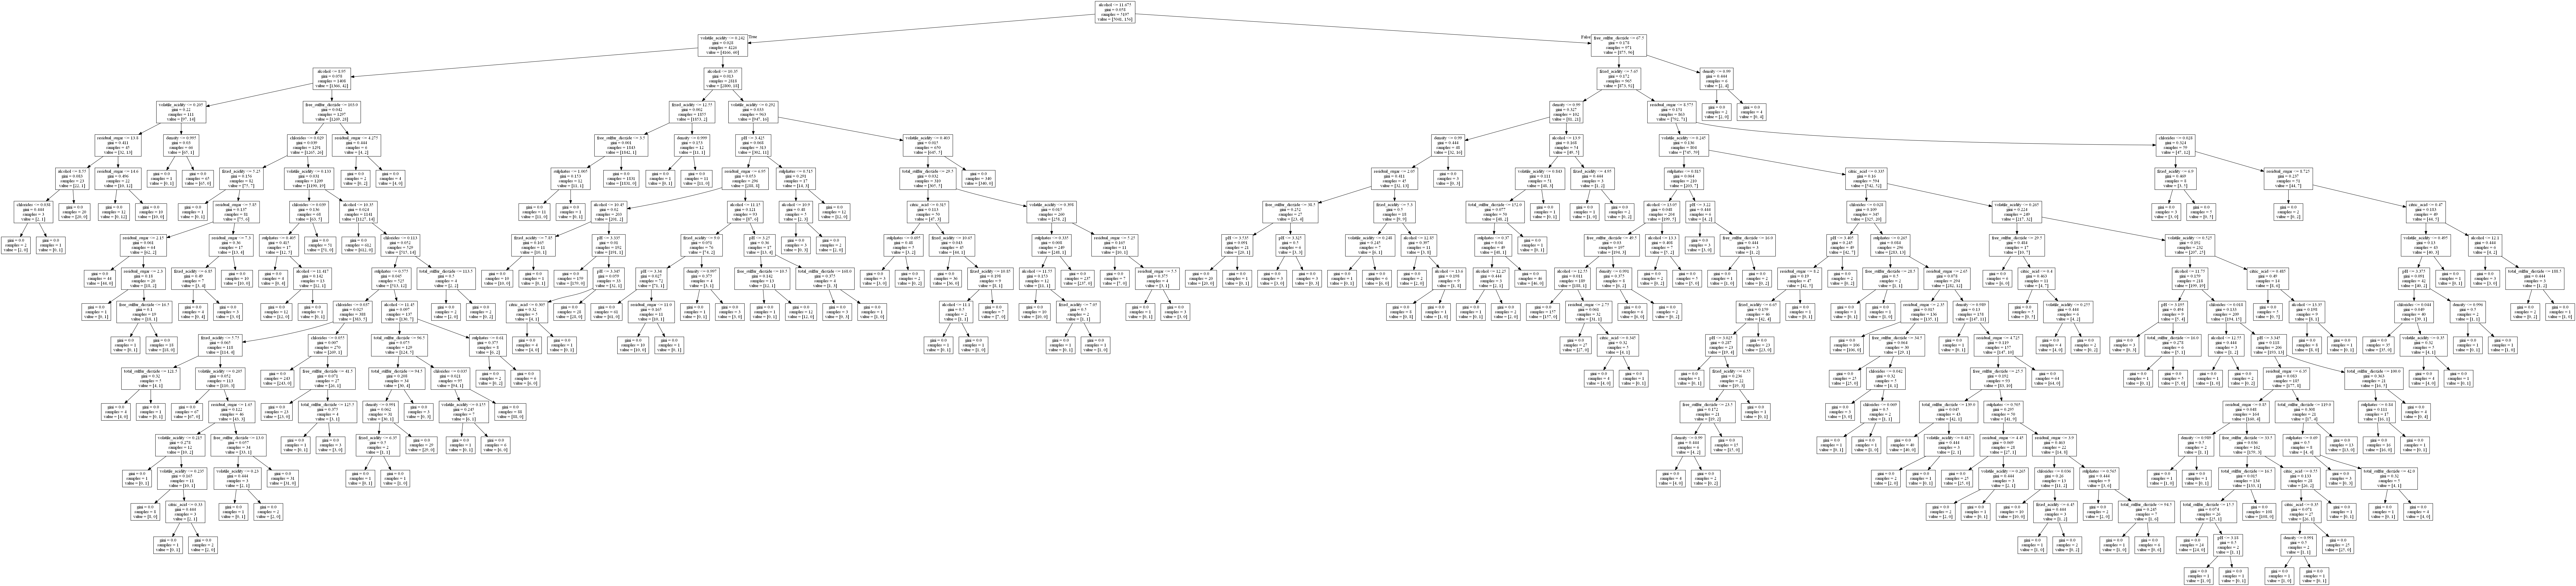

In [120]:
dot_data = StringIO()  
tree.export_graphviz(model2, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Wine_quality.png")
Image(graph.create_png())  